# Advanced Data Analysis Exercise

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('averagebicyclecounts-bydayandhourfromjanuary2020-tojune2020.csv')
data

,SITE_ID,DESCRIPTION,MONTHS,YEARS,HOURS,SATURDAY,SUNDAY,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY
0,9,"Gateway Motorway South, Murarrie",January,2020,0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,9,"Gateway Motorway South, Murarrie",January,2020,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9,"Gateway Motorway South, Murarrie",January,2020,2,0.0,0.0,2.0,1.0,1.0,1.0,1.0
3,9,"Gateway Motorway South, Murarrie",January,2020,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,"Gateway Motorway South, Murarrie",January,2020,4,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2318,6086,Deagon Wetland (CMU-6086),June,2020,19,1.0,1.0,7.0,7.0,4.0,5.0,5.0
2319,6086,Deagon Wetland (CMU-6086),June,2020,20,1.0,0.0,1.0,9.0,7.0,3.0,1.0
2320,6086,Deagon Wetland (CMU-6086),June,2020,21,0.0,0.0,0.0,3.0,2.0,1.0,0.0
2321,6086,Deagon Wetland (CMU-6086),June,2020,22,0.0,0.0,0.0,0.0,3.0,0.0,0.0


## Examine which day is the busiest day with a lot of bicycle on the road

In [27]:
# convert from wide to tall table format
tall_df = data.melt(id_vars=["SITE_ID", "DESCRIPTION", "YEARS", "MONTHS", "HOURS"], 
                    var_name="Days",
                    value_name="BicycleCount")
tall_df.head()

,SITE_ID,DESCRIPTION,YEARS,MONTHS,HOURS,Days,BicycleCount
0,9,"Gateway Motorway South, Murarrie",2020,January,0,SATURDAY,1.0
1,9,"Gateway Motorway South, Murarrie",2020,January,1,SATURDAY,1.0
2,9,"Gateway Motorway South, Murarrie",2020,January,2,SATURDAY,0.0
3,9,"Gateway Motorway South, Murarrie",2020,January,3,SATURDAY,0.0
4,9,"Gateway Motorway South, Murarrie",2020,January,4,SATURDAY,0.0


Find the busiest day

In [30]:
tall_df.groupby(["__"])["BicycleCount"].mean()

Days
FRIDAY       21.664014
MONDAY       22.792049
SATURDAY     23.699046
SUNDAY       23.947596
THURSDAY     21.929659
TUESDAY      24.388014
WEDNESDAY    23.070215
Name: BicycleCount, dtype: float64

In [40]:
# Group the data by the site and days
# Check the average bicycle count by site
avg_bicycle_count_per_site = tall_df \
    .groupby(["__", "__"])["__"] \
    .mean() \
    .reset_index()

avg_bicycle_count_per_site

,DESCRIPTION,Days,BicycleCount
0,"ANZAC Park, Toowong",FRIDAY,49.557692
1,"ANZAC Park, Toowong",MONDAY,51.989130
2,"ANZAC Park, Toowong",SATURDAY,56.850467
3,"ANZAC Park, Toowong",SUNDAY,51.666667
4,"ANZAC Park, Toowong",THURSDAY,49.479167
...,...,...,...
128,Veloway1,SATURDAY,31.256944
129,Veloway1,SUNDAY,32.506944
130,Veloway1,THURSDAY,44.652778
131,Veloway1,TUESDAY,51.861111


## Find the top 10 busiest site

In [56]:
# Find the top 10 site with the most total bicycle Count over the entire week
# Replace the "__" with a proper variable name

avg_bicycle_count_per_site \
    .groupby("__")["__"] \
    .sum() \
    .sort_values(ascending=False) \
    .head(3) #change this value

DESCRIPTION
Park Road, Woolloongabba    521.832724
ANZAC Park, Toowong         361.472416
Normanby West, Brisbane     361.125000
Name: BicycleCount, dtype: float64

## Plot the average daily bicycle count in Queensland

In [60]:
daily_df = tall_df \
    .groupby(["__"])["__"] \
    .mean() \
    .reset_index()
daily_df

,Days,BicycleCount
0,FRIDAY,21.664014
1,MONDAY,22.792049
2,SATURDAY,23.699046
3,SUNDAY,23.947596
4,THURSDAY,21.929659
5,TUESDAY,24.388014
6,WEDNESDAY,23.070215


<AxesSubplot:xlabel='Days'>

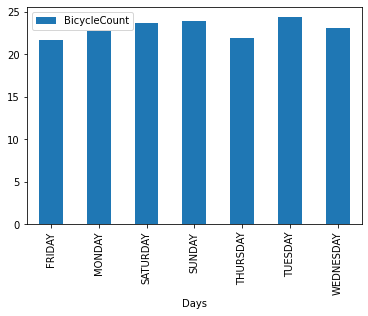

In [67]:
daily_df.plot("__", "__", kind="bar")